# Profiling engine demo

## With papermill (monitoring doesn't work)

Let's run a notebook with the default engine and monitor memory usage (via `mprof`)

In [1]:
%%sh
mprof run papermill ../tests/assets/profiling.ipynb tmp.ipynb

Input Notebook:  ../tests/assets/profiling.ipynb
Output Notebook: tmp.ipynb
Executing: 100%|██████████| 8/8 [00:21<00:00,  2.65s/cell]


mprof: Sampling memory every 0.1s
running new process


Now, let's generate the plot and display it:

In [2]:
%%sh
mprof plot --output papermill.png

Using last profile data.


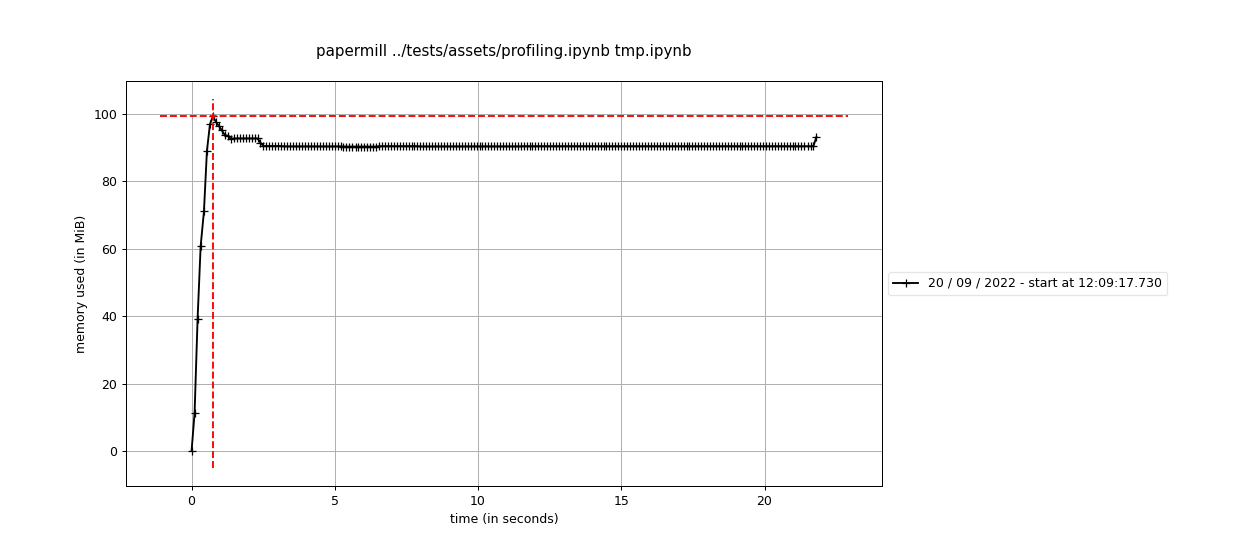

In [3]:
from IPython.display import Image
Image('papermill.png')

We can see that memory usage remains constant, since the default engine only sends messages to another process and waits for responses.

## Profiling engine (resource monitoring works!)

Let's switch to the profiling engine:

In [4]:
%%sh
mprof run papermill ../tests/assets/profiling.ipynb tmp.ipynb --engine profiling

Input Notebook:  ../tests/assets/profiling.ipynb
Output Notebook: tmp.ipynb
Executing: 100%|██████████| 8/8 [00:20<00:00,  2.62s/cell]


mprof: Sampling memory every 0.1s
running new process


In [5]:
%%sh
mprof plot --output profiling.png

Using last profile data.


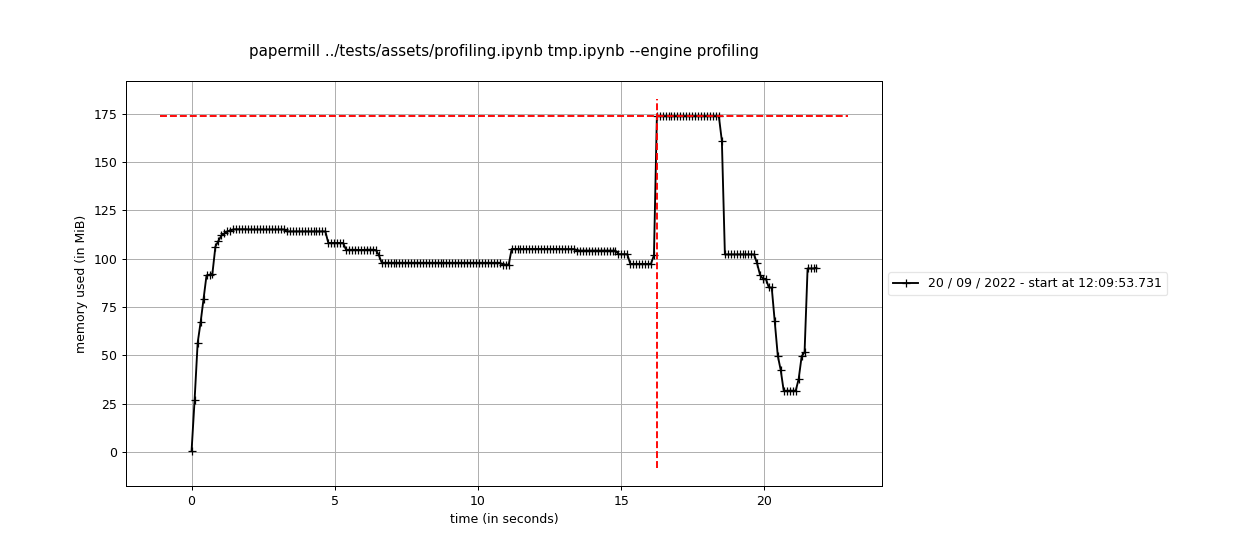

In [6]:
Image('profiling.png')

In this last plot, we see that we can track memory usage since the notebook is executed in the same process.